# Variational Integrators

In [1]:
# author: Christian Offen
# accompanying source code for the handbook article 
# "Solving ODEs for Nonlinear Dynamics with Symplectic and Geometric Integration" within "Handbook on Nonlinear Dynamics. Volume 2 Numerical Methods", World Scientific, editor: Vincent Acary

In [2]:
using Plots
using LinearAlgebra
using LaTeXStrings

## Evolution function of particle in a field

In [3]:
# 1 step method
# see section 3.2.3 Example (Particle in a field, variational trapezoidal rule)
function Evolution(y0,p0,N,dt,Mass,gradU)

    ## Computation of trajectory
    ## variational trapezoidal rule
    
    # pre-allocation
    y = zeros(length(y0),N+1)
    y[:,1] .= y0
    
    # initial step
    y[:,2] .= y0 + dt.*(Mass\(p0-dt/2.0.*gradU(y0)))

    # iteration
    for k=2:N
        y[:,k+1].=2*y[:,k]-y[:,k-1]-dt^2*(Mass\gradU(y[:,k]))
    end

    return y
end

Evolution (generic function with 1 method)

In [4]:
function Momenta(y,p0,Mass,dt,gradU)

    ## Computation of conjugate momenta
    
    p = Mass*(y[:,2:end]-y[:,1:end-1])/dt - dt/2*mapslices(gradU,y[:,2:end],dims=1)
    return [p0 p]
end

Momenta (generic function with 1 method)

In [5]:
function Velocities(p,Mass)

    ## Computation of velocities
    
    ydot = Mass\p
    return ydot
end

Velocities (generic function with 1 method)

## Initialization

In [6]:
## Two uncoupled pendula
Mass = I                  # mass matrix 
U(y) = sum(cos.(y))     # potential (for energy evaluation)
gradU(y) = -sin.(y)     # gradient of potential 

# initial data
y0 = [0.1, pi-0.2]
y0dot = [0., 0.]
p0 = Mass*y0dot

# iteration number, step-size
N = 1000
dt = 0.1;

## Computations

In [7]:
y = Evolution(y0,p0,N,dt,Mass,gradU)
p = Momenta(y,p0,Mass,dt,gradU)
ydot = Velocities(p,Mass);

## Plots

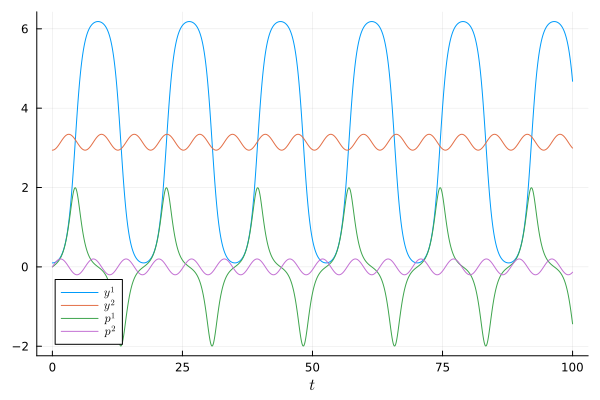

In [8]:
# dynamics

t = 0:dt:N*dt

dynPlot=plot(t,y',label=[L"y^1" L"y^2"])
dynPlot=plot!(t,p',label=[L"p^1" L"p^2"])
dynPlot=plot!(xlabel=L"t")

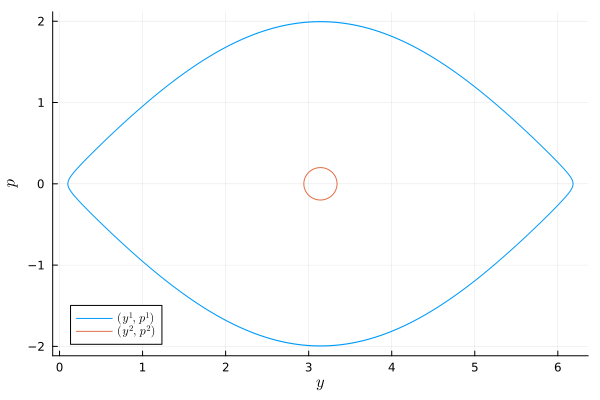

In [9]:
# plots phase space
phasePlot=plot(y[1,:],p[1,:],label=L"(y^1,p^1)")
phasePlot=plot!(y[2,:],p[2,:],label=L"(y^2,p^2)")
phasePlot=plot!(xlabel=L"y",ylabel=L"p")

## Energy conservation

In [10]:
# energy function
energy(y,ydot) = 1/2*ydot'*Mass*ydot + U(y)

# allow vector-valued calls with [y;ydot]
function Energy(yydot::Vector,energy)
    n = Int(length(yydot)/2)
    y = yydot[1:n]; ydot=yydot[n+1:end]
    return energy(y,ydot)
end

function Energy(yydot::Matrix,energy)
    return mapslices(yydot->Energy(yydot,energy),yydot,dims=1)
end

Energy (generic function with 2 methods)

In [11]:
# compute energy error
energy_dynamics =  energy.(eachcol(y),eachcol(ydot));
energy_conservation = energy_dynamics .- energy_dynamics[1];

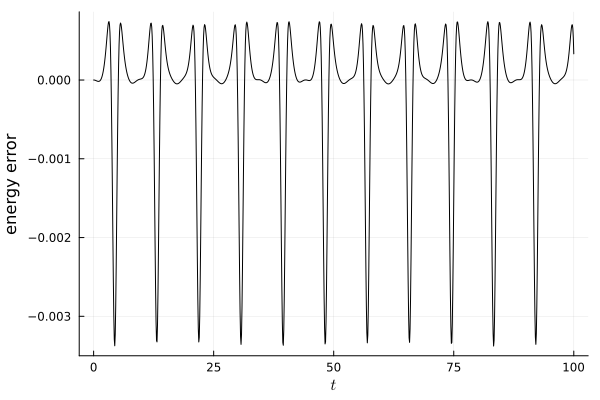

In [12]:
# plot energy error
ePlot=plot(t,energy_conservation,ylabel="energy error",label="",xlabel=L"t",color=:black)